In [2]:
import pandas as pd 
data=pd.read_csv("previous_games.csv")
data

,player1_id,player1_name,player1_color,player1_nb_moves,player2_id,player2_name,player2_color,player2_nb_moves,winner_id,winner_name,winner_color,winner_nb_moves,start_time,end_time,game_time
0,1,guillaume,yellow,8,2,mathieu,red,7,1,guillaume,yellow,8,08-02-2022 18:42:23,08-02-2022 18:43:21,00:00:58
1,1,guillaume,yellow,4,2,mathieu,red,4,2,mathieu,red,4,08-02-2022 19:01:42,08-02-2022 19:02:16,00:00:34
2,1,julien,yellow,4,2,mathieu,red,4,2,mathieu,red,4,08-02-2022 19:04:10,08-02-2022 19:04:40,00:00:29
3,1,julien,yellow,4,2,guillaume,red,4,2,guillaume,red,4,08-02-2022 19:29:32,08-02-2022 19:30:01,00:00:29
4,1,maxime,yellow,6,2,julien,red,6,2,julien,red,6,08-02-2022 19:30:21,08-02-2022 19:30:44,00:00:22
5,1,victore,yellow,6,2,mathieu,red,5,1,victore,yellow,6,08-02-2022 19:31:03,08-02-2022 19:31:25,00:00:22


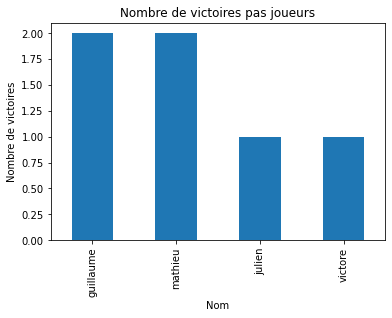

In [5]:
#Nombre victoires par joueur
a=data['winner_name'].value_counts()
a.sort_values(ascending=False).plot.bar(title="Nombre de victoires pas joueurs",xlabel="Nom",ylabel="Nombre de victoires")

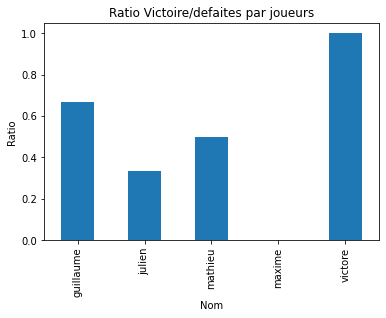

In [6]:
#ratio victoire defaite par joueur

#La difficulté que j'ai rencontré est que chaque personne peut étre joueur 1 ou joueur 2.
#Cela va donc conpléxifié le code pour faire de l'agrégation

a=data['winner_name'].value_counts() #je recupére le nombre de victoire par joueur
z =data['player1_name'] # je recupére le nombre de partie pour le joeur 1
y =data['player2_name'] # pour le 2
r=pd.concat([z, y]) # j'aggrége le résultat 
b=r.value_counts() #J'ai donc le nombre total de parties par joueurs
(a/b).fillna(0).plot.bar(title="Ratio Victoire/defaites par joueurs",xlabel="Nom",ylabel="Ratio") #je peux calculer le ratio 

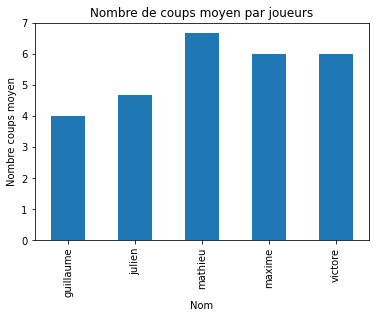

In [7]:
#nombre de coup moyen par joueur et par partie

#Méme problématique que pour le ratio, mais cette fois ci je récupére un data frame à 2 collones
#je commence par récupéré le nombre de coups par joueur un et deux
z =data[['player1_name','player1_nb_moves']].rename(columns={'player1_name': 'nom','player1_nb_moves': 'nb'})#Je renomme les data frame pour pouvoir facilement l'agrégé avec le joeur deux
y =data[['player2_name','player2_nb_moves']].rename(columns={'player2_name': 'nom','player2_nb_moves': 'nb'})
r=pd.concat([z, y])# J'aggrége le resultat pour avoir le nombre de coup total (Joueur un et deux)
r=r.groupby(['nom']).sum().sort_values(by='nom', ascending=True)#je regroupe tous cela par nom + j'affecte un ordre croissant
#Ensuite le de parties
a =data[['player1_name']].rename(columns={'player1_name': 'nom'})
b =data[['player2_name']].rename(columns={'player2_name': 'nom'})
c=pd.concat([a, b]).sort_values(by='nom', ascending=True)# méme méthode que pour récupérer le nombre de coups mais pour le nombre de partie total + j'affecte un ordre croissant
c=c.value_counts().tolist()# je veux récupérer seulement une liste de nombre


(r['nb']/c).plot.bar(title="Nombre de coups moyen par joueurs",xlabel="Nom",ylabel="Nombre coups moyen") # je peux faire cela car r(nb coups par joueur) et c(nombre de parties) sont triés de la méme façon selon le nom du joeur


In [ ]:
#Répartition du choix des couleurs par joueurs
z =data[['player1_name','player1_color']].rename(columns={'player1_name': 'nom','player1_color': 'couleur'})
y =data[['player2_name','player2_color']].rename(columns={'player2_name': 'nom','player2_color': 'couleur'})
r=pd.concat([z.value_counts(), y.value_counts()])
r.groupby(['nom','couleur']).sum()



nom        couleur
guillaume  red        1
           yellow     2
julien     red        1
           yellow     2
mathieu    red        4
maxime     yellow     1
victore    yellow     1
dtype: int64

In [ ]:
#temps moyen par parti et par joueurs

from datetime import datetime
z =data[['player1_name','game_time']].rename(columns={'player1_name': 'nom','game_time': 'nb'})#Je renomme les data frame pour pouvoir facilement l'agrégé avec le joeur deux
y =data[['player2_name','game_time']].rename(columns={'player2_name': 'nom','game_time': 'nb'})

z['nb']= pd.to_datetime(z['nb'])# je convertit le type object de la collonne nb en date time
y['nb']= pd.to_datetime(y['nb'])
r=pd.concat([z, y])
r=r.groupby('nom').mean() 
r['nb'] = r['nb'].astype(object)
r['nb']= pd.to_datetime(r['nb']).dt.time #les étapes précédentes mon permisent déviter que la collone nb comporte en plus du temps la date tout en pouvent utiliser la fonction concat
r

,nb
nom,
guillaume,00:00:40.333333
julien,00:00:26.666666
mathieu,00:00:35.750000
maxime,00:00:22
victore,00:00:22


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


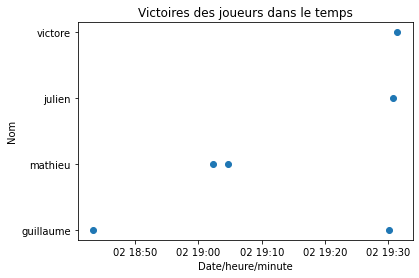

In [9]:
#répartion de la victoire des joeurs dans le temps

import matplotlib.pyplot as plt
a=data[['winner_name','end_time']]
a['end_time']=pd.to_datetime(a['end_time'])
x_values =  a['end_time']
y_values = a['winner_name']
plt.title("Victoires des joueurs dans le temps")
plt.xlabel("Date/heure/minute")
plt.ylabel("Nom")
plt.scatter(x_values, y_values)
